# Time Series
A time series model is one that attempts to relate the value of a variable(s) at one time point with values of the variable(s) at previous time points, for example,
$$GNP_{t+1} = f (GNP_t ,GNP_{t−1},GNP_{t−2},...)+ \text{Error}.$$
Here, $t$ denotes the time. Thus “simple” time series models, like the one above, are “black-box”.
More complex time series models are explanatory in that they try to relate the value of the variable of interest not simply with its previous values but also with previous values of other “explanatory” variables.


In [47]:
#Importing required libraries
from pandas import read_excel
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Australian monthly electricity production, displays a clear trend and
seasonality

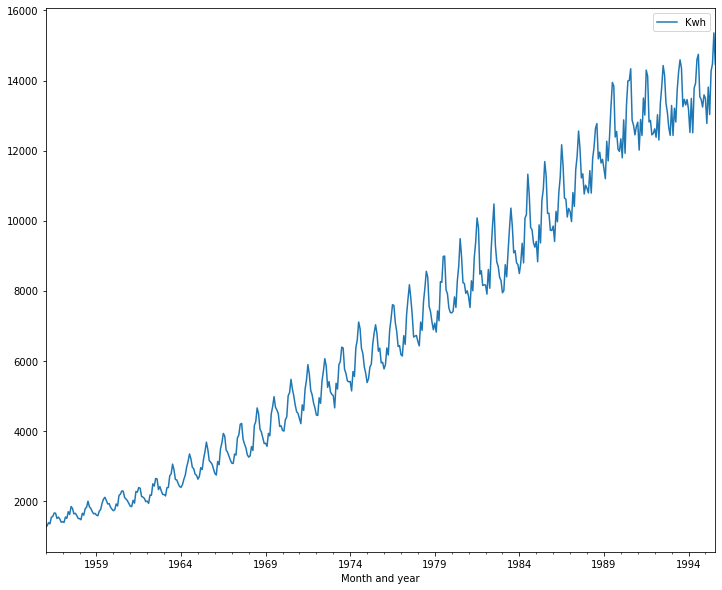

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('Electricity.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

<ipython-input-48-b4da879ebbf2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)


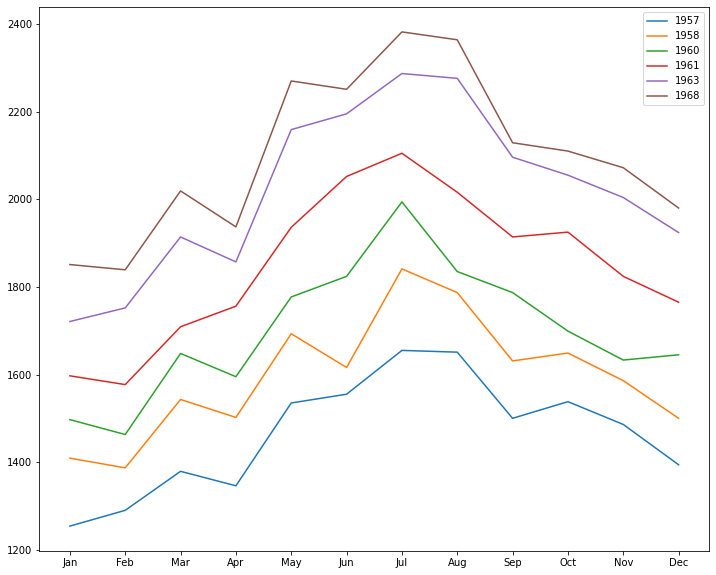

In [48]:
# to show the seasonality trend
series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

The following bricks production data in Australia does not show a clear trend

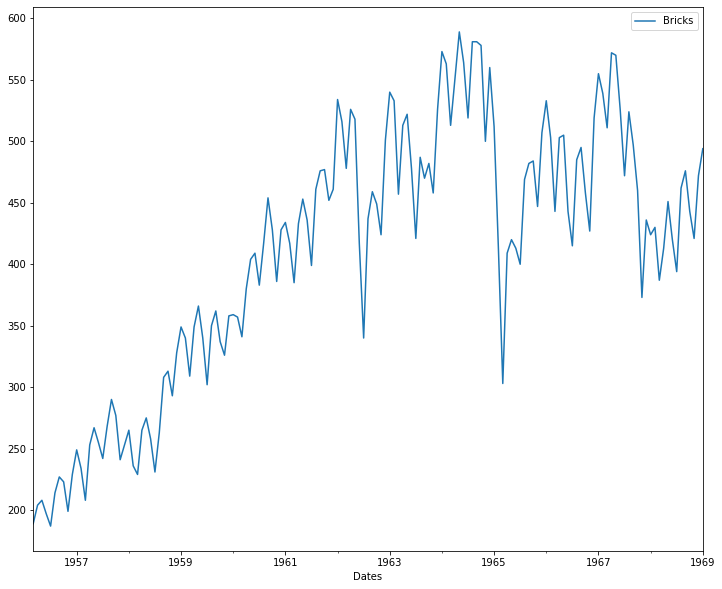

In [43]:

fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('ClayBricks.xls', sheet_name='BRICKSQ', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

Australian clay brick production contains occasional large fluctuations which
are difficult to explain, and hence predict, without knowing the underlying causes

<ipython-input-44-104ea269e2f7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)


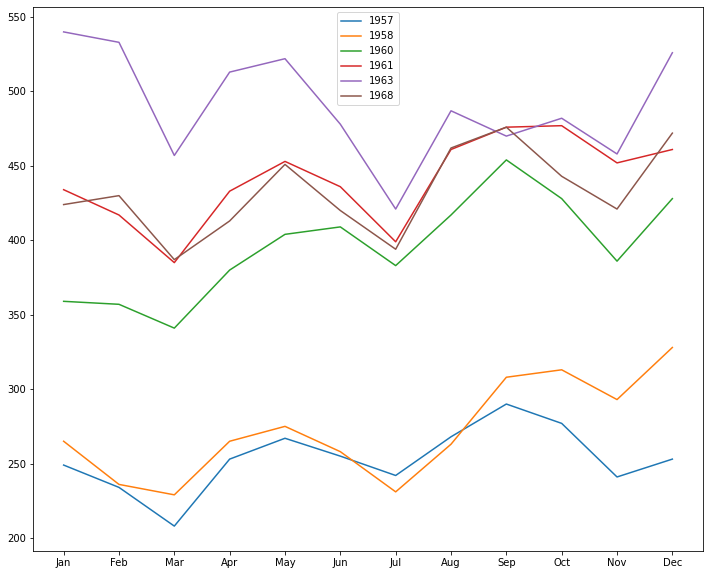

In [44]:
series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

# Correlation
$Cov_{XY} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$

$Cov_{XY}$ represents the covariance between X and Y.
n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
The sum is taken over all n observations.

$r_{XY} = \frac{Cov_{XY}}{S_X S_Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$
n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
$S_X$ and $S_Y$ are the standard deviations of X and Y, respectively.
The sum is taken over all n observations.


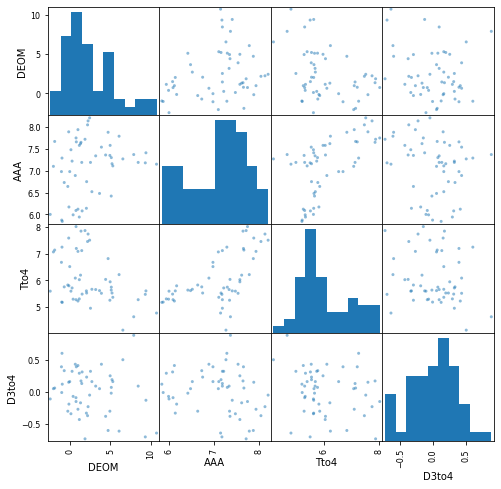

           DEOM       AAA      Tto4     D3to4
DEOM   1.000000  0.256840 -0.391274 -0.194680
AAA    0.256840  1.000000  0.587047 -0.203849
Tto4  -0.391274  0.587047  1.000000 -0.201443
D3to4 -0.194680 -0.203849 -0.201443  1.000000


In [46]:
# Covariance matrix
series = read_excel('Bank.xls', sheet_name='Data3', header=0,
                     dtype=float)

#Plotting the scatter plots of each variable against the other one
pd.plotting.scatter_matrix(series, figsize=(8, 8))
plt.show()

# Correlation matrix for all the variables, 2 by 2
CorrelationMatrix = series.corr()
print(CorrelationMatrix)

In [57]:
# Correlation calculation
series1 = read_excel('JapaneseCars.xls', sheet_name='Data', header=0,
                      dtype=float)
correlval=np.corrcoef(series1['Mileage'], series1['Price'])
correlval=correlval[1,0]
print(correlval)

-0.7277246246668201


In [61]:
np.sum((series1['Mileage'] - series1['Mileage'].mean()) * (series1['Price'] - series1['Price'].mean())) / np.sqrt(((series1['Mileage'] - series1['Mileage'].mean())**2).sum() * ((series1['Price'] - series1['Price'].mean())**2).sum())

-0.7277246246668201

<ipython-input-50-7af873c4fd08>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series1 = read_excel('CementProduction.xls', sheet_name='Data', header=0,
<ipython-input-50-7af873c4fd08>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series2 = read_excel('CementProduction.xls', sheet_name='SeasonalData', header=0,


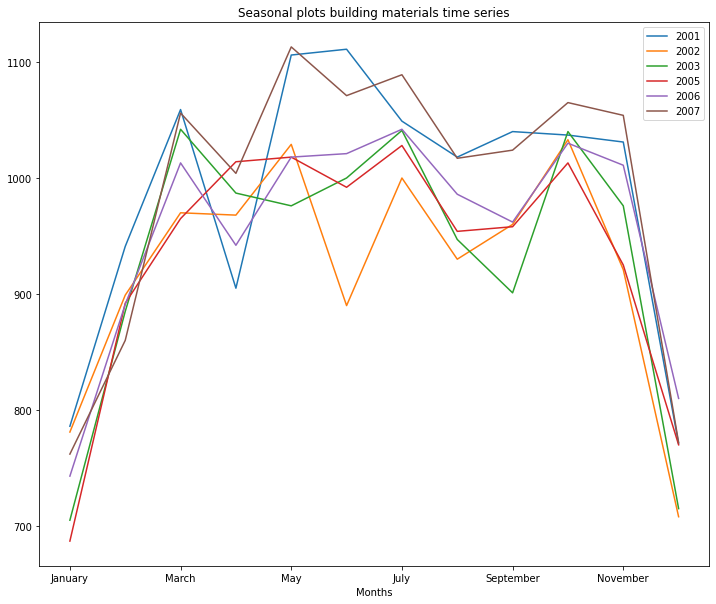

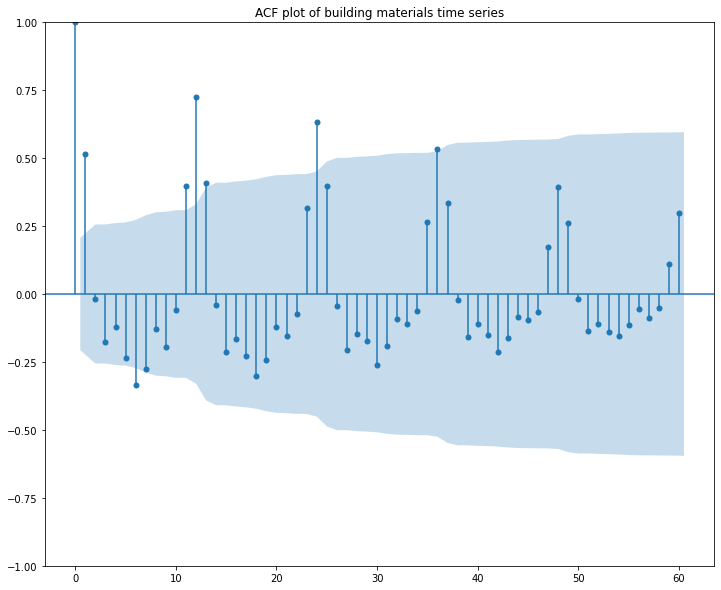

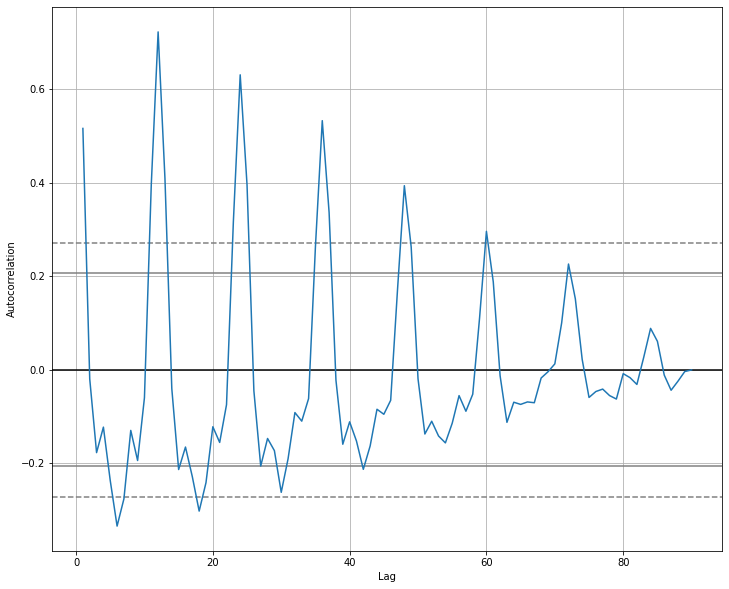

In [50]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
series1 = read_excel('CementProduction.xls', sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
series2 = read_excel('CementProduction.xls', sheet_name='SeasonalData', header=0,
                    index_col=0, parse_dates=True)
fig, ax = plt.subplots(figsize=(12,10))
series2.plot(title='Seasonal plots building materials time series', ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,10))
plot_acf(series1, title='ACF plot of building materials time series', lags=60, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,10))
autocorrelation_plot(series1, ax=ax)
plt.show()

# Decomposition
The basic approach in analysing the underlying structure of a time series is to decompose it as
$$Y_t = f (S_t ,T_t ,E_t ),$$
where $Y_t$ is the observed value at time $t$ and the variables are defined as follows:
- $S_t$ is the seasonal component at time $t$;
- $T_t$ is the trend-cycle component at time $t$;
- $E_t$ is an irregular (random) component at time $t$.


# Additive Decomposition

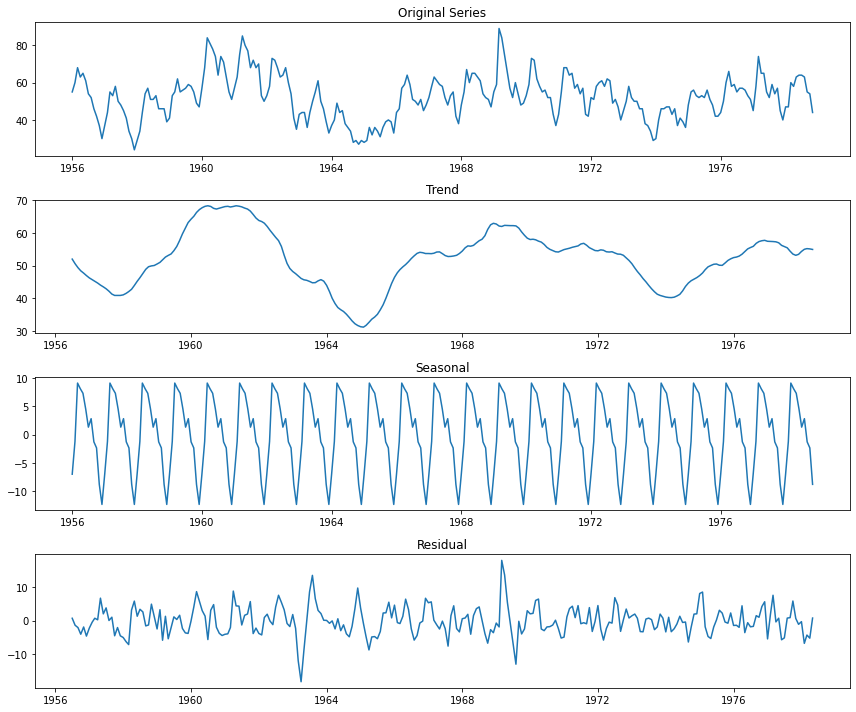

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

series = read_excel('HouseSales.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10))

# Plot original series
ax1.plot(result.observed)
ax1.set_title('Original Series')

# Plot trend component
ax2.plot(result.trend)
ax2.set_title('Trend')

# Plot seasonal component
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')

# Plot residual component
ax4.plot(result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


# Multiplicative Decomposition

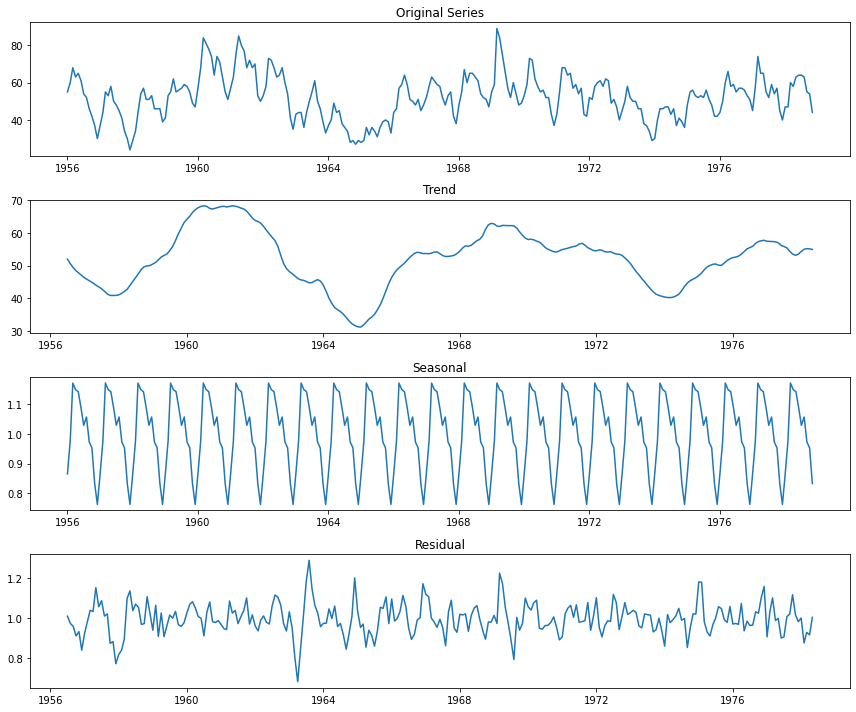

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

series = read_excel('HouseSales.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='multiplicative')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10))

# Plot original series
ax1.plot(result.observed)
ax1.set_title('Original Series')

# Plot trend component
ax2.plot(result.trend)
ax2.set_title('Trend')

# Plot seasonal component
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')

# Plot residual component
ax4.plot(result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


# Sqrt Transform

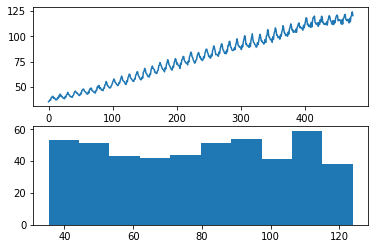

In [53]:
from numpy import sqrt
from pandas import DataFrame
series = read_excel('Electricity.xls',
              sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['electricity']
dataframe['electricity'] = sqrt(dataframe['electricity'])
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(dataframe['electricity'])
# histogram
plt.subplot(212)
plt.hist(dataframe['electricity'])
plt.show()

# Log Transform

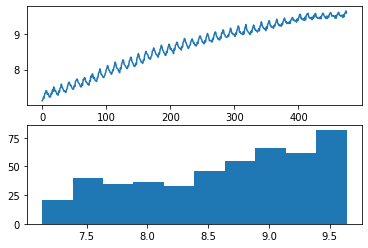

In [54]:
from numpy import log
series = read_excel('Electricity.xls',
              sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['electricity']
dataframe['electricity'] = log(dataframe['electricity'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['electricity'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['electricity'])
pyplot.show()

# Calendar adjustments
If data is for calendar months, then account might have to be taken of the length of a month. The difference between the longest and shortest months is about $\frac{(31- 28)}{30} = 10\%$. The adjustment needed is

$$
W_t = \frac{\text{# of days in an average month}}{\text{# of days in month } i} \times Y_t = \frac{365.25/12}{\text{# of days in month } i} \times Y_t
$$


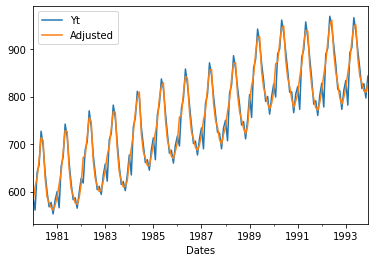

In [55]:
series = read_excel('MilkProduction.xls',
              sheet_name='AdjustedData', header=0,
              index_col=0, parse_dates=True)  # you can include various other parameters
series.plot()
pyplot.show()